In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
def plot_indicator(var_indicator, var ='pr_value', prct_column = 'percentile', var_name = 'Precipitation'):
    var_october_april = var_indicator[(var_indicator['date'].str.startswith('Oct')) | (var_indicator['date'].str.startswith('Apr'))]
    colors = [(230/255,0,0,1), (255/255,170/255,0,1), (252/255,211/255,127/255,1), (255/255,255/255,0,1), (189/255,190/255,192/255,1), (189/255,190/255,192/255,1), (189/255,190/255,192/255,1), (189/255,190/255,192/255,1)]
    hr_names = var_indicator['HR_NAME'].unique()
    hr_names = ['Sacramento River', 'San Joaquin River', 'Tulare Lake']
    
    # Create subplots
    fig, axs = plt.subplots(2, 1, figsize=(12, 5))
    
    # Top plot: pr_value
    for i, hr_name in enumerate(hr_names):
        data = var_indicator[var_indicator['HR_NAME'] == hr_name]
        axs[0].plot(data['date'], data[var], label=hr_name, linewidth=2.5)
    
    axs[0].set_xticks(var_october_april['date'].unique())
    axs[0].set_xlim(var_indicator['date'].iloc[0], var_indicator['date'].iloc[-1])   
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, fontsize=8) 
    axs[0].set_ylabel(f'{var_name} amount')
    axs[0].legend(loc='upper right')
    axs[0].set_title(f'{var_name} in Major Hydrolological Regions')
    # axs[0].grid(True)

    # Bottom plot: Precipitation Drought Condition
    for i, hr_name in enumerate(hr_names):
        data = var_indicator[var_indicator['HR_NAME'] == hr_name]
        axs[1].plot(data['date'], data[prct_column], label=hr_name, linewidth=2.5)
    
    # Set custom y-axis ticks and limits for the bottom plot
    axs[1].set_yticks([0, 0.1, 0.2, 0.3, 0.5, 1])
    axs[1].set_ylim(0, 1)
    
    # Set x-axis ticks and limits for the bottom plot
    axs[1].set_xticks(var_october_april['date'].unique())
    axs[1].set_xlim(var_indicator['date'].iloc[0], var_indicator['date'].iloc[-1])
    
    # Add text labels for different drought conditions
    axs[1].text(var_indicator['date'].iloc[0], 0.05, 'Extreme Drought')
    axs[1].text(var_indicator['date'].iloc[0], 0.15, 'Severe Drought')
    axs[1].text(var_indicator['date'].iloc[0], 0.25, 'Moderate Drought')
    axs[1].text(var_indicator['date'].iloc[0], 0.4, 'Abnormally Dry')
    
    # Fill the areas representing different drought conditions
    axs[1].fill_between(var_indicator['date'], 0, 0.1, color=colors[0], alpha=0.6)
    axs[1].fill_between(var_indicator['date'], 0.1, 0.2, color=colors[1], alpha=0.6)
    axs[1].fill_between(var_indicator['date'], 0.2, 0.3, color=colors[2], alpha=0.6)
    axs[1].fill_between(var_indicator['date'], 0.3, 0.5, color=colors[3], alpha=0.6)
    
    # Set titles and labels for the bottom plot
    axs[1].set_title(f'{var_name} Drought Condition')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel(prct_column)
    axs[1].legend(loc='upper right')
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, fontsize=8)
    
    plt.tight_layout()
    plt.show()


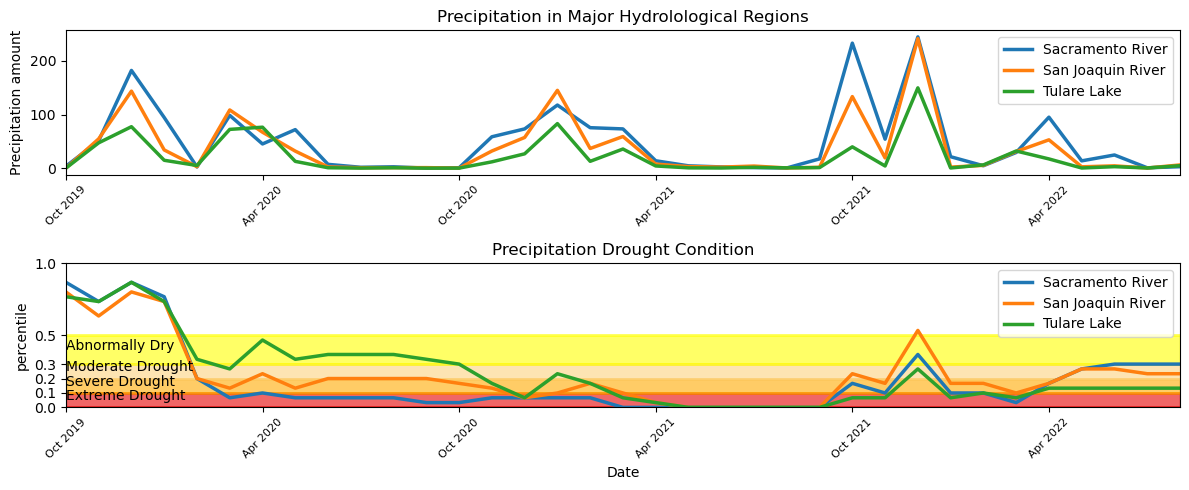

In [53]:
pr_indicator = pd.read_csv('not preprocessed/pr_percentile.csv')
pr_indicator['date'] = pd.to_datetime(pr_indicator['date'])
pr_indicator = pr_indicator.loc[(pr_indicator['date'] >= '2019-10-01') & (pr_indicator['date'] <= '2022-09-01')]
pr_indicator['date'] = pr_indicator['date'].dt.strftime('%b %Y')
plot_indicator(pr_indicator, var ='pr_value', prct_column = 'percentile', var_name = 'Precipitation')

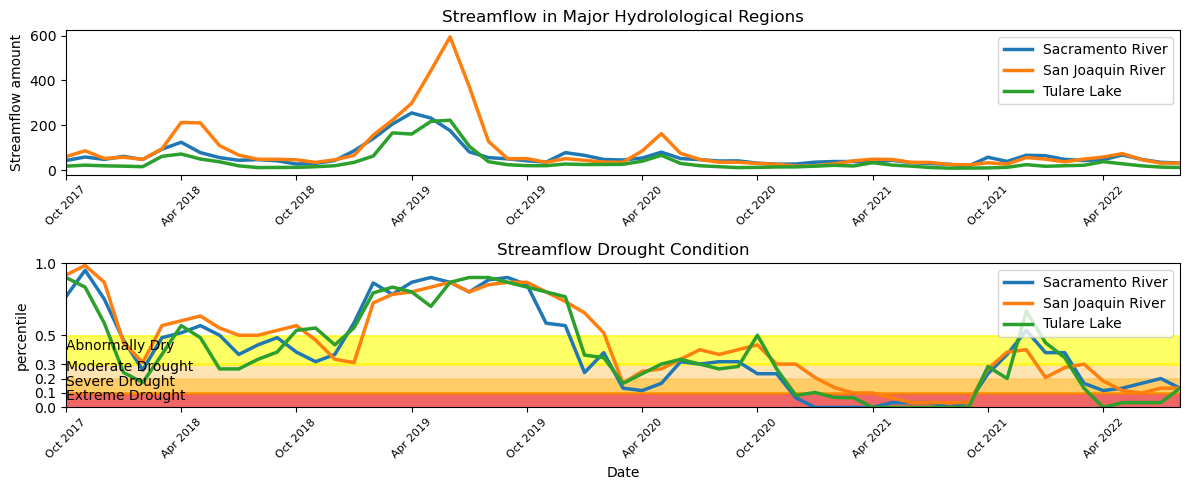

In [21]:
sf_indicator = pd.read_csv('not preprocessed/streamflow_regional_indicator.csv')
sf_indicator['date'] = pd.to_datetime(sf_indicator['date'])
sf_indicator = sf_indicator.loc[(sf_indicator['date'] >= '2017-10-01') & (sf_indicator['date'] <= '2022-09-01')]
sf_indicator['date'] = sf_indicator['date'].dt.strftime('%b %Y')

plot_indicator(sf_indicator, var ='flow', prct_column = 'percentile', var_name = 'Streamflow')

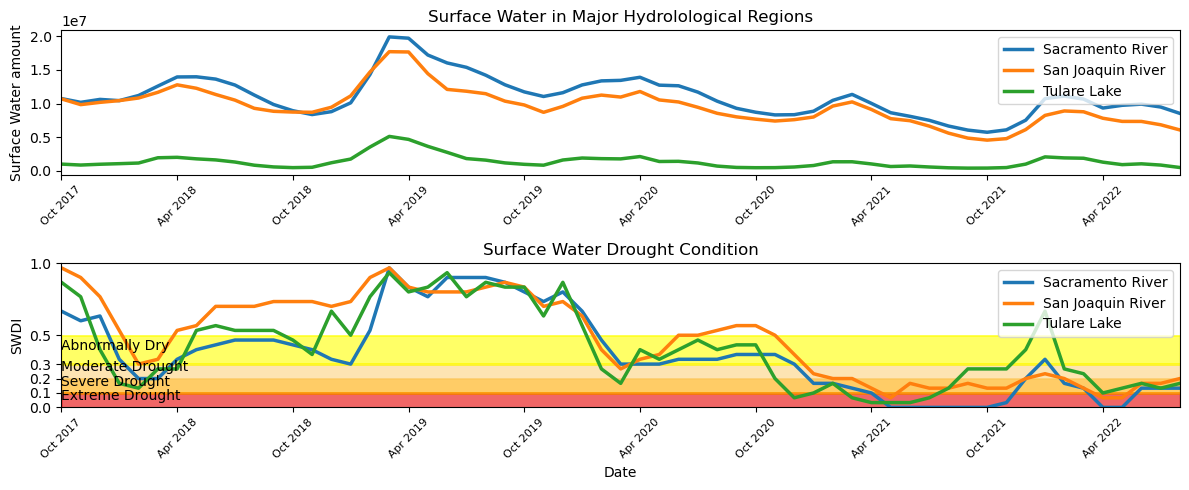

In [54]:
storage_indicator = pd.read_csv('not preprocessed/total_storage_percentiles.csv')
storage_indicator['date'] = pd.to_datetime(storage_indicator['date'])
storage_indicator = storage_indicator.loc[(storage_indicator['date'] >= '2017-10-01') & (storage_indicator['date'] <= '2022-09-01')]
storage_indicator['date'] = storage_indicator['date'].dt.strftime('%b %Y')

plot_indicator(storage_indicator, var ='value_period', prct_column = 'SWDI', var_name = 'Surface Water')


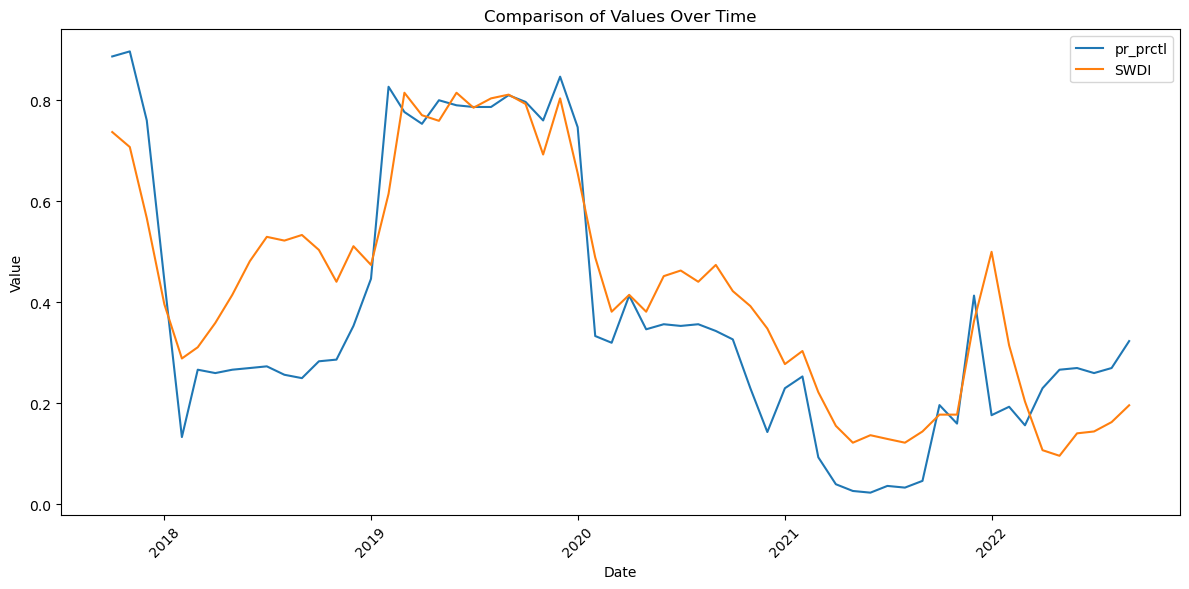

In [24]:
#%%
pr_indicator = pd.read_csv('not preprocessed/pr_percentile.csv')
pr_indicator['date'] = pd.to_datetime(pr_indicator['date'],format='mixed')
pr_indicator['date'] = pr_indicator['date'].dt.strftime('%b %Y')

storage_indicator = pd.read_csv('not preprocessed/total_storage_percentiles.csv')
storage_indicator['date'] = pd.to_datetime(storage_indicator['date'],format='mixed')
storage_indicator['date'] = storage_indicator['date'].dt.strftime('%b %Y')

gw_indicator = pd.read_csv('not preprocessed/state_wells_regional_analysis.csv')
gw_indicator['date'] = pd.to_datetime(gw_indicator['date'],format='mixed')
gw_indicator['date'] = gw_indicator['date'].dt.strftime('%b %Y')

sf_indicator = pd.read_csv('not preprocessed/streamflow_regional_indicator.csv')
sf_indicator['date'] = pd.to_datetime(sf_indicator['date'],format='mixed')
sf_indicator['date'] = sf_indicator['date'].dt.strftime('%b %Y')

# pr_indicator['date'] = pd.to_datetime(pr_indicator['date'])
# pr_indicator = pr_indicator.loc[(pr_indicator['date'] >= '2017-10-01') & (pr_indicator['date'] <= '2022-09-01')]

# hr_names = ['Sacramento River', 'San Joaquin River', 'Tulare Lake']

av_pr = pr_indicator[['date','percentile']].groupby(['date']).mean()
av_sf = sf_indicator[['date','percentile']].groupby(['date']).mean()
av_strg = storage_indicator[['date','SWDI']].groupby(['date']).mean()
av_gw = gw_indicator[['date','pctl_gwelev']].groupby(['date']).mean()

# Merge all datasets on 'HR_NAME' and 'date'
merged_data = av_pr.merge(av_sf, on=['date'], how='outer')
merged_data = merged_data.merge(av_strg, on=[ 'date'], how='outer')
merged_data = merged_data.merge(av_gw, on=[ 'date'], how='outer')
merged_data = merged_data.reset_index()
merged_data['date'] = pd.to_datetime(merged_data['date'],format='mixed')
merged_data = merged_data.sort_values(by='date')
merged_data = merged_data.loc[(merged_data['date'] >= '2017-10-01') & (merged_data['date'] <= '2022-09-01')]
merged_data.columns = ['date','pr_prctl','strmflw_prctl','SWDI','pctl_gwelev']
#%%
# Plot the merged data for the specified HR_NAMES
plt.figure(figsize=(12, 6))
# Plot percentile_x, percentile_y, SWDI, and pctl_gwelev columns
plt.plot(merged_data['date'], merged_data['pr_prctl'], label='pr_prctl')
# plt.plot(merged_data['date'], merged_data['strmflw_prctl'], label='strmflw_prctl')
plt.plot(merged_data['date'], merged_data['SWDI'], label='SWDI')
# plt.plot(merged_data['date'], merged_data['pctl_gwelev'], label='pctl_gwelev')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Values Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [48]:
import numpy as np
pr_indicator = pd.read_csv('not preprocessed/pr_percentile.csv')
pr_indicator['date'] = pd.to_datetime(pr_indicator['date'],format='mixed')
pr_indicator['date'] = pr_indicator['date'].dt.strftime('%b %Y')

storage_indicator = pd.read_csv('not preprocessed/total_storage_percentiles.csv')
storage_indicator['date'] = pd.to_datetime(storage_indicator['date'],format='mixed')
storage_indicator['date'] = storage_indicator['date'].dt.strftime('%b %Y')

av_pr = pr_indicator[['date','pr_value','percentile']].groupby(['date']).mean()
av_strg = storage_indicator[['date','reservoir_storage','res_percentile']].groupby(['date']).mean()
merged_data = av_pr.merge(av_strg, on=['date'], how='outer')
merged_data.reset_index(inplace=True)
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data = merged_data.loc[(merged_data['date'] >= '2016-10-01') & (merged_data['date'] <= '2022-09-01')]
merged_data = merged_data.sort_values(by='date')
# Convert 'date' column to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])

C:\Users\armen\AppData\Local\Temp\ipykernel_30296\781697153.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['date'] = pd.to_datetime(merged_data['date'])


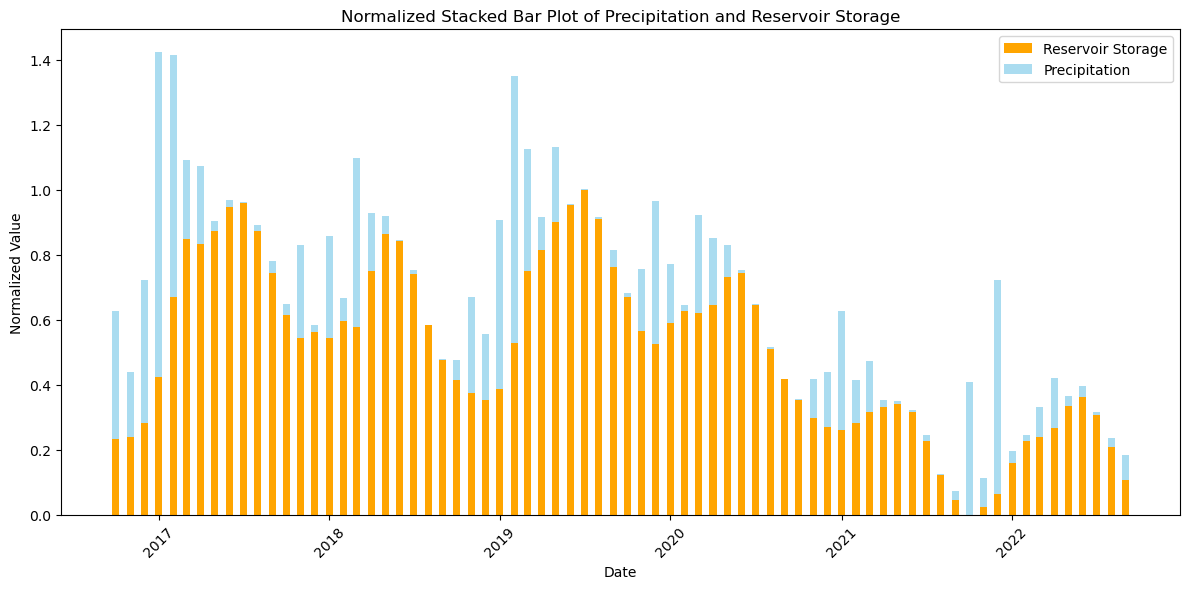

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Normalize 'reservoir_storage' and 'pr_value'
scaler = MinMaxScaler()
merged_data[['reservoir_storage_normalized', 'pr_value_normalized']] = scaler.fit_transform(merged_data[['reservoir_storage', 'pr_value']])

# Plotting
plt.figure(figsize=(12, 6))
bar_width =15
# Plotting normalized stacked bar plot for 'reservoir_storage' and 'pr_value'
plt.bar(merged_data['date'], merged_data['reservoir_storage_normalized'], label='Reservoir Storage', color='orange', width=bar_width)  # Set width to make bars thicker
plt.bar(merged_data['date'], merged_data['pr_value_normalized'], bottom=merged_data['reservoir_storage_normalized'], label='Precipitation', color='skyblue', alpha=0.7, width=bar_width)

plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Normalized Stacked Bar Plot of Precipitation and Reservoir Storage')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

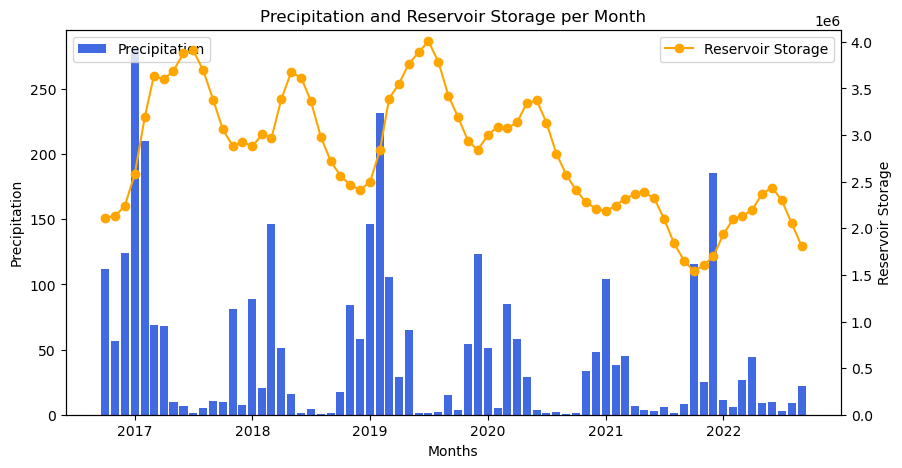

In [51]:
# Extracting data from merged_data
pr_values = merged_data["pr_value"]
reservoir_storage = merged_data["reservoir_storage"]
months = merged_data['date']
# Create a stacked bar plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot precipitation
ax1.bar(months, pr_values, label='Precipitation', color='royalblue', width=25)

# Create a secondary y-axis for reservoir storage
ax2 = ax1.twinx()
ax2.plot(months, reservoir_storage, '-o', color='orange', label='Reservoir Storage')
ax2.set_ylim(bottom=0)
# Label axes and legend
ax1.set_ylabel('Precipitation')
ax2.set_ylabel('Reservoir Storage')
ax1.set_xlabel('Months')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.title('Precipitation and Reservoir Storage per Month')
plt.show()

C:\Users\armen\AppData\Local\Temp\ipykernel_30296\263290953.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['date'] = pd.to_datetime(merged_data['date'])


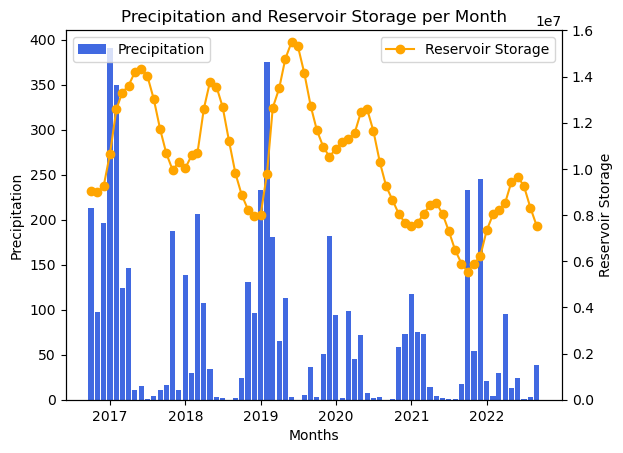

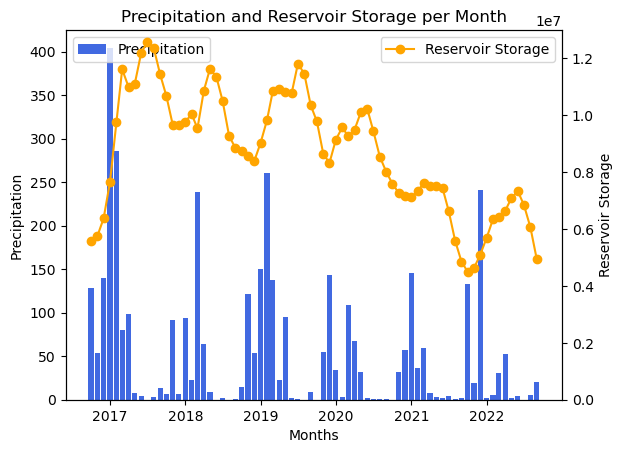

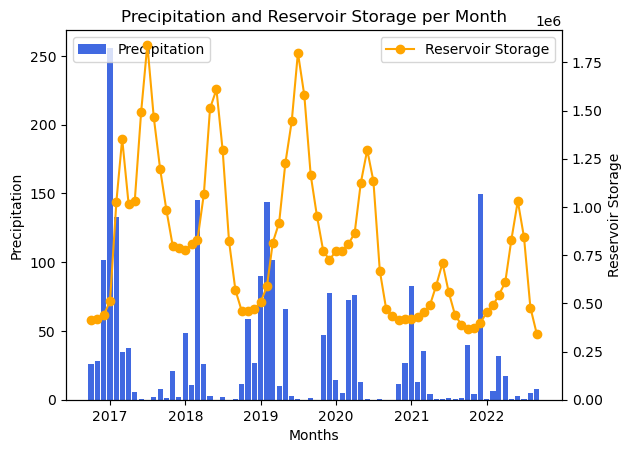

In [45]:
import pandas as pd
pr_indicator = pd.read_csv('not preprocessed/pr_percentile.csv')
pr_indicator['date'] = pd.to_datetime(pr_indicator['date'],format='mixed')
pr_indicator['date'] = pr_indicator['date'].dt.strftime('%b %Y')

storage_indicator = pd.read_csv('not preprocessed/total_storage_percentiles.csv')
storage_indicator['date'] = pd.to_datetime(storage_indicator['date'],format='mixed')
storage_indicator['date'] = storage_indicator['date'].dt.strftime('%b %Y')

merged_data = pr_indicator.merge(storage_indicator, on=['HR_NAME','date'], how='outer')
merged_data.reset_index(inplace=True)
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data = merged_data.loc[(merged_data['date'] >= '2016-10-01') & (merged_data['date'] <= '2022-09-01')]
merged_data = merged_data.sort_values(by='date')
hr_names = ['Sacramento River', 'San Joaquin River', 'Tulare Lake']
merged_data = merged_data[merged_data['HR_NAME'].isin(hr_names)]

#%%
import matplotlib.pyplot as plt
for hr in hr_names:
    selected_data = merged_data.loc[merged_data.HR_NAME == hr]
    pr_values = selected_data["pr_value"]
    reservoir_storage = selected_data["reservoir_storage"]
    months = selected_data['date']
    
    # Create a stacked bar plot
    fig, ax1 = plt.subplots()

    # Plot precipitation
    ax1.bar(months, pr_values, label='Precipitation', color='royalblue', width=25)

    # Create a secondary y-axis for reservoir storage
    ax2 = ax1.twinx()
    ax2.plot(months, reservoir_storage, '-o', color='orange', label='Reservoir Storage')
    ax2.set_ylim(bottom=0)
    # Label axes and legend
    ax1.set_ylabel('Precipitation')
    ax2.set_ylabel('Reservoir Storage')
    ax1.set_xlabel('Months')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show plot
    plt.title('Precipitation and Reservoir Storage per Month')
    plt.show()


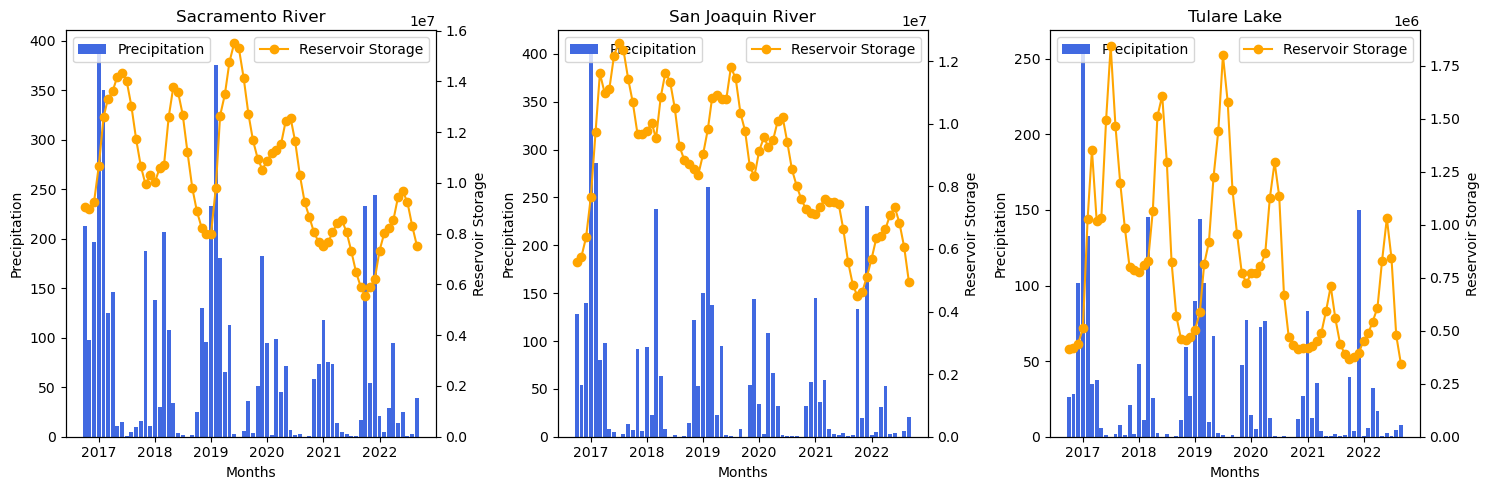

In [38]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and the number of HR regions as columns
fig, axes = plt.subplots(1, len(hr_names), figsize=(15, 5))

for i, hr in enumerate(hr_names):
    # Filter data for the current HR region
    selected_data = merged_data.loc[merged_data['HR_NAME'] == hr]
    pr_values = selected_data["pr_value"]
    reservoir_storage = selected_data["reservoir_storage"]
    months = selected_data['date']
    
    # Plot on the current subplot
    ax1 = axes[i]
    
    # Plot precipitation
    ax1.bar(months, pr_values, label='Precipitation', color='royalblue', width=25)

    # Create a secondary y-axis for reservoir storage
    ax2 = ax1.twinx()
    ax2.plot(months, reservoir_storage, '-o', color='orange', label='Reservoir Storage')
    ax2.set_ylim(bottom=0)
    
    # Label axes and legend
    ax1.set_ylabel('Precipitation')
    ax2.set_ylabel('Reservoir Storage')
    ax1.set_xlabel('Months')
    ax1.set_title(hr)  # Set subplot title as HR region name
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


C:\Users\armen\AppData\Local\Temp\ipykernel_30296\3587387703.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)
C:\Users\armen\AppData\Local\Temp\ipykernel_30296\3587387703.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)
C:\Users\armen\AppData\Local\Temp\ipykernel_30296\3587387703.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)


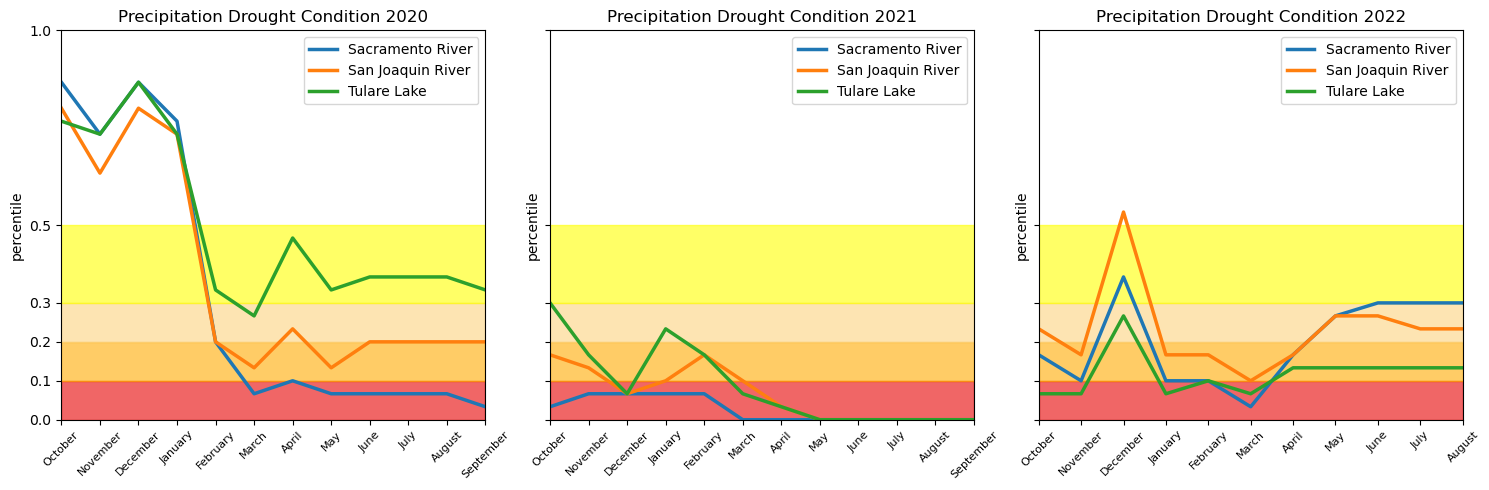

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
pr_indicator = pd.read_csv('not preprocessed/pr_percentile.csv')
pr_indicator['date'] = pd.to_datetime(pr_indicator['date'])
pr_indicator = pr_indicator.loc[(pr_indicator['date'] >= '2017-10-01') & (pr_indicator['date'] <= '2022-09-01')]
pr_indicator['date'] = pr_indicator['date'].dt.strftime('%b %Y')
var_indicator = pr_indicator
var ='pr_value'
prct_column = 'percentile'
var_name = 'Precipitation'
#%%
var_october_april = var_indicator[(var_indicator['date'].str.startswith('Oct')) | (var_indicator['date'].str.startswith('Apr'))]
colors = [(230/255,0,0,1), (255/255,170/255,0,1), (252/255,211/255,127/255,1), (255/255,255/255,0,1), (189/255,190/255,192/255,1), (189/255,190/255,192/255,1), (189/255,190/255,192/255,1), (189/255,190/255,192/255,1)]
hr_names = var_indicator['HR_NAME'].unique()
hr_names = ['Sacramento River', 'San Joaquin River', 'Tulare Lake']

#%%
pr_indicator = pd.read_csv('not preprocessed/pr_percentile.csv')
pr_indicator['date'] = pd.to_datetime(pr_indicator['date'])
pr_indicator = pr_indicator.loc[(pr_indicator['date'] >= '2019-10-01') & (pr_indicator['date'] <= '2022-09-01')]

#%%
var_indicator = pr_indicator
def get_water_year(date):
    if date.month > 9:  # If month is October or later
        return date.year + 1
    else:
        return date.year
var_indicator['water_year'] = var_indicator['date'].apply(get_water_year)
var_indicator['month'] = var_indicator['date'].dt.month
# Create a dictionary mapping month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Map month numbers to month names
var_indicator['month'] = var_indicator['month'].map(month_names)
#%%
# Get unique water years
water_years = var_indicator['water_year'].unique()
# Create subplots
num_water_years = len(water_years)
fig, axes = plt.subplots(1, num_water_years, figsize=(15, 5),sharey=True)

# Plotting for each water year
for i, water_year in enumerate(water_years):
    ax = axes[i]
    for hr_name in hr_names:
        data = pr_indicator[(var_indicator['water_year'] == water_year) & (var_indicator['HR_NAME'] == hr_name)]
        ax.plot(data['month'], data[prct_column], label=hr_name, linewidth=2.5)
    
    # Set custom y-axis ticks and limits for the bottom plot
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.5, 1])
    ax.set_ylim(0, 1)

    # Set x-axis ticks and limits for the bottom plot
    # ax.set_xticks(var_october_april['month'].unique())
    ax.set_xlim(data['month'].iloc[0], data['month'].iloc[-1])

    # Add text labels for different drought conditions
    # ax.text(data['month'].iloc[0], 0.05, 'Extreme Drought')
    # ax.text(data['month'].iloc[0], 0.15, 'Severe Drought')
    # ax.text(data['month'].iloc[0], 0.25, 'Moderate Drought')
    # ax.text(data['month'].iloc[0], 0.4, 'Abnormally Dry')

    # # Fill the areas representing different drought conditions
    ax.fill_between(data['month'], 0, 0.1, color=colors[0], alpha=0.6)
    ax.fill_between(data['month'], 0.1, 0.2, color=colors[1], alpha=0.6)
    ax.fill_between(data['month'], 0.2, 0.3, color=colors[2], alpha=0.6)
    ax.fill_between(data['month'], 0.3, 0.5, color=colors[3], alpha=0.6)

    # Set titles and labels for the bottom plot
    ax.set_title(f'{var_name} Drought Condition {water_year}')
    # ax.set_xlabel('Date')
    ax.set_ylabel(prct_column)
    ax.legend(loc='upper right')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


C:\Users\armen\AppData\Local\Temp\ipykernel_30296\680308822.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['date'] = pd.to_datetime(merged_df['date'])


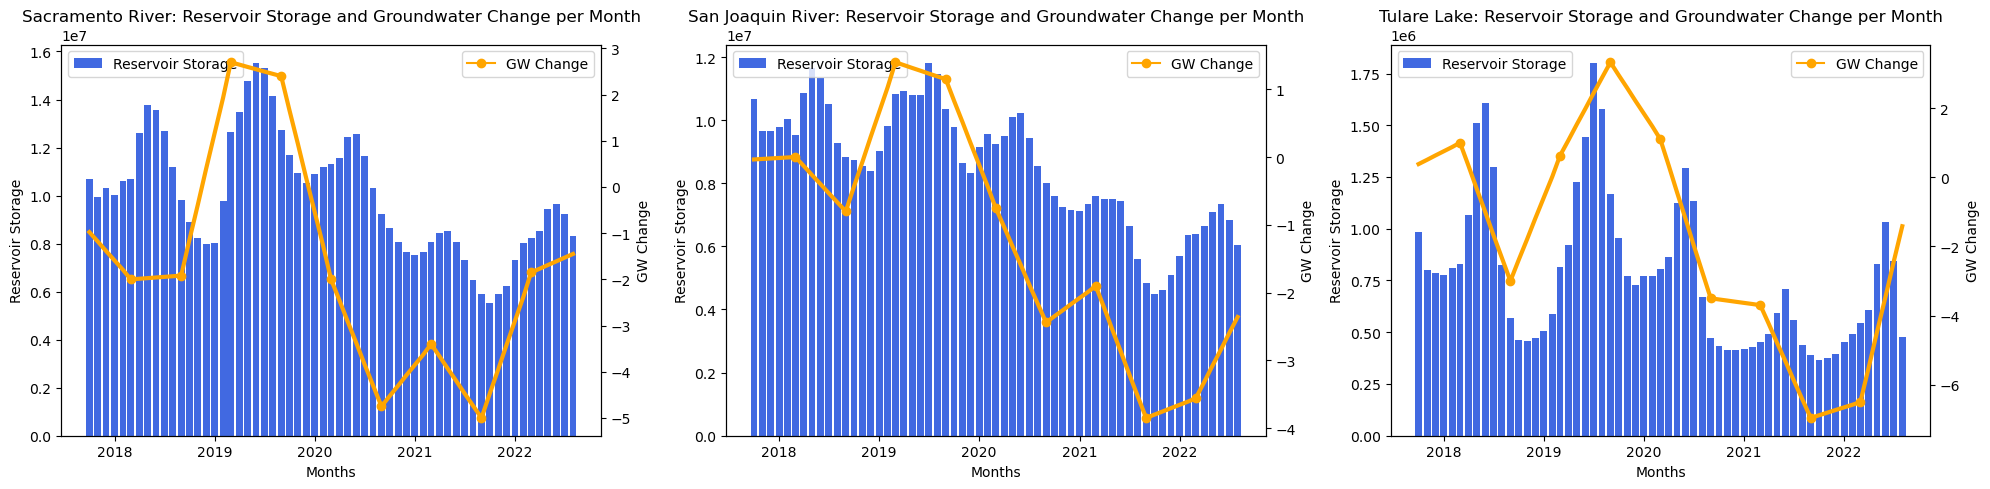

In [67]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 22 15:06:18 2024

@author: armen
"""

import pandas as pd
import matplotlib.pyplot as plt
storage_indicator = pd.read_csv('not preprocessed/total_storage_percentiles.csv')
storage_indicator['date'] = pd.to_datetime(storage_indicator['date'])
storage_indicator = storage_indicator.loc[(storage_indicator['date'] >= '2017-10-01') & (storage_indicator['date'] <= '2022-09-01')]
storage_indicator['date'] = storage_indicator['date'].dt.strftime('%b %Y')


gw_indicator = pd.read_csv('not preprocessed/state_wells_regional_analysis.csv')
gw_indicator['date'] = pd.to_datetime(gw_indicator['date'])
gw_indicator = gw_indicator.loc[(gw_indicator['date'] >= '2017-10-01') & (gw_indicator['date'] <= '2022-09-01')]
gw_indicator['date'] = gw_indicator['date'].dt.strftime('%b %Y')

#%%
merged_df = pd.merge(storage_indicator[['date','HR_NAME','reservoir_storage']],gw_indicator[['date','HR_NAME','gwchange']], on=['date','HR_NAME'],how='outer')
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['gwchange_interpolate'] = merged_df['gwchange'].interpolate()

#%% 

# Define HR names
hr_names = ['Sacramento River', 'San Joaquin River', 'Tulare Lake']

# Create subplots for each HR name
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Loop through each HR name and plot data
for i, hr_name in enumerate(hr_names):
    # Extract data for the current HR name
    merged_df_HR = merged_df.loc[merged_df.HR_NAME == hr_name]
    months = merged_df_HR['date']
    reservoir_storage = merged_df_HR['reservoir_storage']
    gwchange = merged_df_HR['gwchange']
    
    # Plot reservoir storage as a bar plot on the current subplot
    axs[i].bar(months, reservoir_storage, label='Reservoir Storage', color='royalblue', width=25)
    
    # Create a secondary y-axis for gwchange
    ax2 = axs[i].twinx()
    ax2.plot(merged_df_HR['date'], merged_df_HR['gwchange'], '-o', color='orange', label='GW Change')
    ax2.plot(merged_df_HR['date'], merged_df_HR['gwchange_interpolate'], '-', linewidth=3, color='orange', label='')
    
    # Label axes and legend
    axs[i].set_ylabel('Reservoir Storage')
    ax2.set_ylabel('GW Change')
    axs[i].set_xlabel('Months')
    axs[i].legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # Set title
    axs[i].set_title(f'{hr_name}: Reservoir Storage and Groundwater Change per Month')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()



C:\Users\armen\AppData\Local\Temp\ipykernel_37048\1183733051.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  merged_data = merged_data.interpolate()


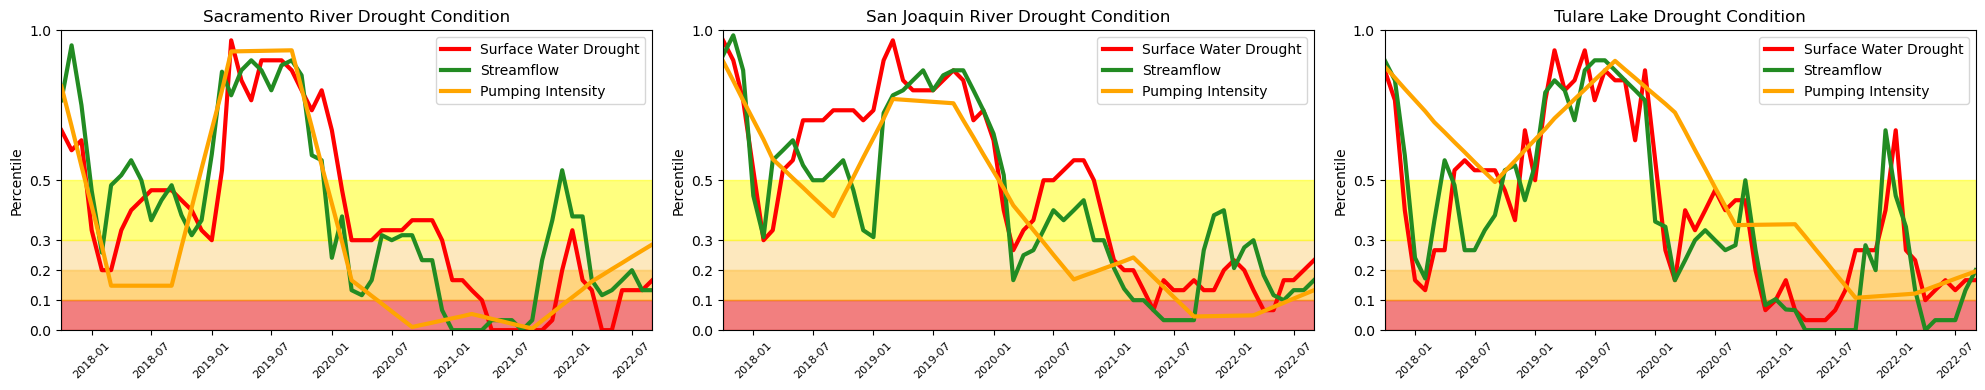

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
pr_indicator = pd.read_csv('not preprocessed/pr_percentile.csv')
pr_indicator['date'] = pd.to_datetime(pr_indicator['date'],format='mixed')
pr_indicator['date'] = pr_indicator['date'].dt.strftime('%b %Y')

storage_indicator = pd.read_csv('not preprocessed/total_storage_percentiles.csv')
storage_indicator['date'] = pd.to_datetime(storage_indicator['date'],format='mixed')
storage_indicator['date'] = storage_indicator['date'].dt.strftime('%b %Y')

gw_indicator = pd.read_csv('not preprocessed/state_wells_regional_analysis.csv')
gw_indicator['date'] = pd.to_datetime(gw_indicator['date'],format='mixed')
gw_indicator['date'] = gw_indicator['date'].dt.strftime('%b %Y')

sf_indicator = pd.read_csv('not preprocessed/streamflow_regional_indicator.csv')
sf_indicator['date'] = pd.to_datetime(sf_indicator['date'],format='mixed')
sf_indicator['date'] = sf_indicator['date'].dt.strftime('%b %Y')

#%%
# Merge all datasets on 'HR_NAME' and 'date'
merged_data = pr_indicator[['date','HR_NAME','percentile']].merge(storage_indicator[['date','HR_NAME','SWDI']], on=['date',"HR_NAME"], how='outer')
merged_data = merged_data.merge(sf_indicator[['date','HR_NAME','percentile']], on=['date',"HR_NAME"], how='outer')
merged_data = merged_data.merge(gw_indicator[['date','HR_NAME','pctl_gwelev','pctl_gwchange_corr','pctl_cumgwchange_corr']], on=['date',"HR_NAME"], how='outer')
merged_data = merged_data.interpolate()
merged_data['date'] = pd.to_datetime(merged_data['date'],format='mixed')
merged_data = merged_data.sort_values(by='date')
merged_data = merged_data.loc[(merged_data['date'] >= '2017-10-01') & (merged_data['date'] <= '2022-09-01')]
merged_data.columns = ['date','HR_NAME','pctl_pr','SWDI','pctl_sf','pctl_gwelev','pctl_gwchange_corr','pctl_cumgwchange_corr']


hr_names = ['Sacramento River', 'San Joaquin River', 'Tulare Lake']
selected_data = merged_data.loc[merged_data.HR_NAME == hr_names[0]]
var_indicator = selected_data

#%%
# Define HR names
hr_names = ['Sacramento River', 'San Joaquin River', 'Tulare Lake']

# Define colors for filling areas
colors = [(230/255,0,0,1), (255/255,170/255,0,1), (252/255,211/255,127/255,1), (255/255,255/255,0,1)]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

for i, hr_name in enumerate(hr_names):
    # Select data for the current HR name
    selected_data = merged_data.loc[merged_data.HR_NAME == hr_name]
    var_indicator = selected_data

# Plot the data on the current subplot
    # axs[i].plot(var_indicator['date'], var_indicator['pctl_pr'], label='Precipitation', linewidth=3, color='blue')
    axs[i].plot(var_indicator['date'], var_indicator['SWDI'], label='Surface Water Drought', linewidth=3, color='red')
    axs[i].plot(var_indicator['date'], var_indicator['pctl_sf'], label='Streamflow', linewidth=3, color='forestgreen')
    axs[i].plot(var_indicator['date'], var_indicator['pctl_gwchange_corr'], label='Pumping Intensity', linewidth=3, color='Orange')
    # axs[i].plot(var_indicator['date'], var_indicator['pctl_cumgwchange_corr'], label='Groundwater Elevation', linewidth=3)
    # Set custom y-axis ticks and limits for the current subplot
    axs[i].set_yticks([0, 0.1, 0.2, 0.3, 0.5, 1])
    axs[i].set_ylim(0, 1)

    # Set x-axis ticks and limits for the current subplot
    axs[i].set_xlim(var_indicator['date'].iloc[0], var_indicator['date'].iloc[-1])

    # Fill the areas representing different drought conditions for the current subplot
    # Fill the areas representing different drought conditions
    axs[i].fill_between(var_indicator['date'], 0, 0.1, color=colors[0], alpha=0.5)
    axs[i].fill_between(var_indicator['date'], 0.1, 0.2, color=colors[1], alpha=0.5)
    axs[i].fill_between(var_indicator['date'], 0.2, 0.3, color=colors[2], alpha=0.5)
    axs[i].fill_between(var_indicator['date'], 0.3, 0.5, color=colors[3], alpha=0.5)

    # Set titles and labels for the current subplot
    axs[i].set_title(f'{hr_name} Drought Condition')
    axs[i].set_ylabel('Percentile')
    axs[i].legend(loc='upper right')
    axs[i].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()